In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy.stats import norm
import pylab
import random

import os

In [3]:
plt.rc('axes', labelsize=22)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [4]:
#A partir de aquí python sabe en que carpeta se encuentran los datos
os.chdir("/home/christian/MEGA/PostDoc_UIS/LAGO/Workshop_LAGO")
os.getcwd()

'/home/christian/MEGA/PostDoc_UIS/LAGO/Workshop_LAGO'

### Simulaciones

Breve script para graficar el espectro de energía del flujo de secundarios.

In [5]:
df= pd.read_table(r"salida_flujo_bga60.hst", delimiter=" ", skiprows=7, skipinitialspace=True, skipfooter=7,
                 names=["distance_in_bin", "N_phot", "N_e+", "N_e-", "N_mu+", "N_mu-", "N_pi0", 
                         "N_pi+", "N_pi-", "N_n", "N_p", "N_pbar", "N_others", "Total_per_bin"])
df.head()

/tmp/ipykernel_44532/2765692725.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df= pd.read_table(r"salida_flujo_bga60.hst", delimiter=" ", skiprows=7, skipinitialspace=True, skipfooter=7,


,distance_in_bin,N_phot,N_e+,N_e-,N_mu+,N_mu-,N_pi0,N_pi+,N_pi-,N_n,N_p,N_pbar,N_others,Total_per_bin
0,0.000050,206.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0
1,0.000063,248.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,248.0
2,0.000079,353.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,353.0
3,0.000100,389.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,389.0
4,0.000126,472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,472.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   distance_in_bin  68 non-null     float64
 1   N_phot           68 non-null     float64
 2   N_e+             68 non-null     float64
 3   N_e-             68 non-null     float64
 4   N_mu+            68 non-null     float64
 5   N_mu-            68 non-null     float64
 6   N_pi0            68 non-null     float64
 7   N_pi+            68 non-null     float64
 8   N_pi-            68 non-null     float64
 9   N_n              68 non-null     float64
 10  N_p              68 non-null     float64
 11  N_pbar           68 non-null     float64
 12  N_others         68 non-null     float64
 13  Total_per_bin    68 non-null     float64
dtypes: float64(14)
memory usage: 7.6 KB


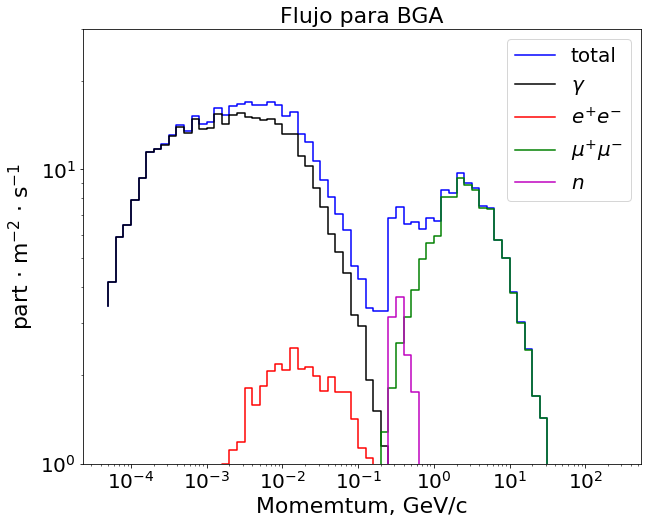

In [34]:
plt.figure(figsize=(10,8))
plt.step(df["distance_in_bin"], df["Total_per_bin"]/60, c="b", label=r"total")
plt.step(df["distance_in_bin"], df["N_phot"]/60, c="k", label=r"$\gamma$")
plt.step(df["distance_in_bin"], (df["N_e+"]+df["N_e-"])/60, c="r", label=r"$e^{+}e^{-}$")
plt.step(df["distance_in_bin"], (df["N_mu+"]+df["N_mu-"])/60, c="g", label=r"$\mu^{+}\mu^{-}$")
plt.step(df["distance_in_bin"], (df["N_n"])/60, c="m", label=r"$n$")
plt.xscale("log")
plt.yscale("log")
plt.ylim(1, 30)
plt.title(r"Flujo para BGA", fontsize=22)
plt.xlabel("Momemtum, GeV/c")
plt.ylabel(r"part $\cdot$ m$^{-2}$ $\cdot$ s$^{-1}$")
plt.legend(fontsize=20)